<h1>Simple Linear Regressor</h1>

In [1]:
import numpy as np
import random

def create_points(x, n, m, min_, max_):
    x_ = []
    y_ = []
    for i in range(m):
        l = random.randint(min_, max_)
        y = x * l + n
        x_.append(l)
        y_.append(y)
        
    return np.array(x_), np.array(y_)

def add_noise(X, mean, dev):
    normal_dist = np.random.normal(mean, dev, X.shape)
    X = np.add(X, normal_dist)
    return X

def create_noisy_points(x, n, m, min_, max_, dev):
    x_, y_ = create_points(x, n, m, min_, max_)
    x_noised = add_noise(x_, 0, dev)
    y_noised = add_noise(y_, 0, dev)
    
    return x_noised, y_noised

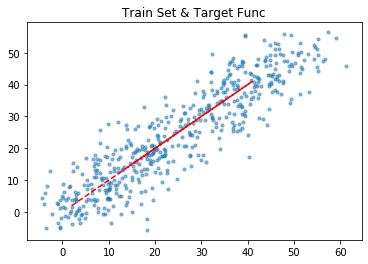

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#Train set
x_noised, y_noised = create_noisy_points(1, 0, 500, 0, 50, 5)
#Target function
x_, y_ = create_points(1, 0, 5, 0, 50)

#Plot
plt.scatter(x_noised, y_noised, s=10, alpha=0.5)
plt.plot(x_, y_, 'r', ls='--')
plt.title("Train Set & Target Func")
plt.show()

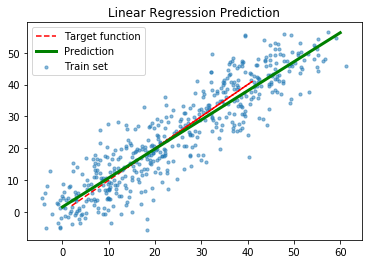

In [3]:
from sklearn.linear_model import LinearRegression

x_noised = x_noised.reshape(-1, 1) #Reshaping is necessary for sklearn only accepts 2d arrays
y_noised = y_noised.reshape(-1, 1) #Reshaping is necessary for sklearn only accepts 2d arrays

linear_regressor = LinearRegression()
linear_regressor.fit(x_noised, y_noised) 

x_predict = np.linspace(0, 60, 60).reshape(-1, 1)
y_predict = linear_regressor.predict(x_predict)

plt.scatter(x_noised, y_noised, s=10, alpha=0.5, label="Train set")
plt.plot(x_, y_, 'r', ls='--', label="Target function")
plt.plot(x_predict, y_predict, 'g', lw=3, label="Prediction")
plt.title("Linear Regression Prediction")
plt.legend()
plt.show()